(iir-filters)=
# IIR filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Poles and digital filter stability

Reference:
- R. Lyons, Understanding Digital Signal Processing 3rd Edition, Section 6.3.1.

In [2]:
def step_response(iir: sdr.IIR, n: int):
    x = np.zeros(n, dtype=np.float32)
    x[0] = 1
    y = iir.filter(x)
    return y

In [3]:
def analyze_iir_by_pole(pole):
    b = np.array([1], dtype=np.complex64)
    a = np.array([1, -pole], dtype=np.complex64)

    iir = sdr.IIR(b, a)
    h = step_response(iir, 20)

    plt.figure(figsize=[10, 4])

    plt.subplot2grid((2, 3), (0, 0), 2, 1)
    unit_circle = np.exp(1j * np.linspace(0, 2 * np.pi, 100))
    plt.plot(unit_circle.real, unit_circle.imag, color="k", linestyle="--")
    plt.plot(pole.real, pole.imag, "x", color="r")
    plt.plot(pole.real, -pole.imag, "x", color="r")
    plt.axis("equal")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Pole Location, $p$")

    plt.subplot2grid((2, 3), (0, 1), 1, 2)
    plt.stem(np.arange(h.size), h.real, linefmt="b-", markerfmt="bo")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.title("Impulse Response (real), $h[n] = p^n u[n]$")

    plt.subplot2grid((2, 3), (1, 1), 1, 2)
    plt.stem(np.arange(h.size), h.imag, linefmt="r-", markerfmt="ro")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.title("Impulse Response (imag), $h[n] = p^n u[n]$")

    plt.tight_layout()
    plt.show()

When the pole is real and inside the unit circle, the impulse response $h[n]$ is an exponential decay.

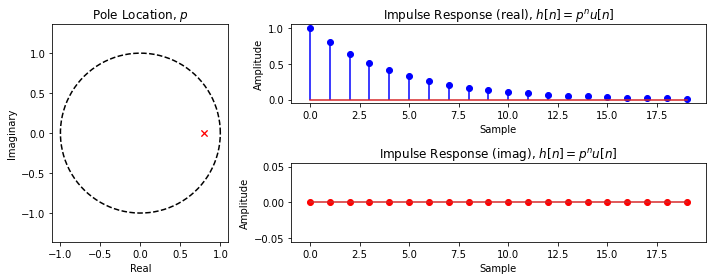

In [4]:
analyze_iir_by_pole(0.8)

When the pole is complex and inside the unit circle, the impulse response $h[n]$ is a decaying complex exponential.

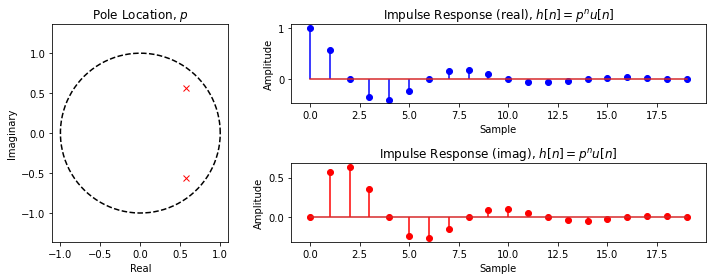

In [5]:
analyze_iir_by_pole(0.8*np.exp(1j*np.pi/4))

When the pole is complex and on the unit circle, the impulse response $h[n]$ is a complex exponential.

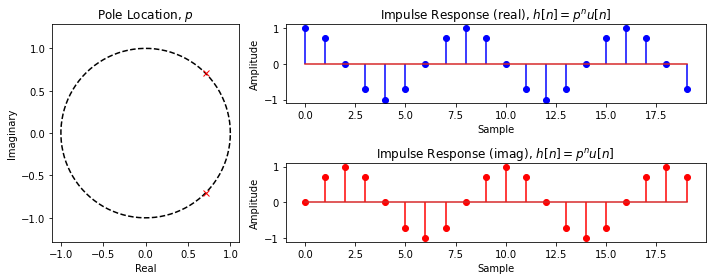

In [6]:
analyze_iir_by_pole(1*np.exp(1j*np.pi/4))

When the pole is real and outside the unit circle, the impulse response $h[n]$ is an exponential.

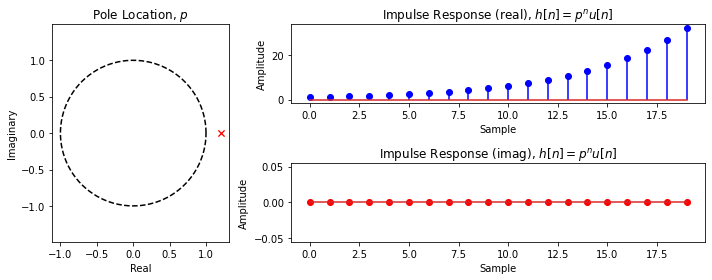

In [7]:
analyze_iir_by_pole(1.2)

When the pole is complex and outside the unit circle, the impulse response $h[n]$ is a increasing complex exponential.

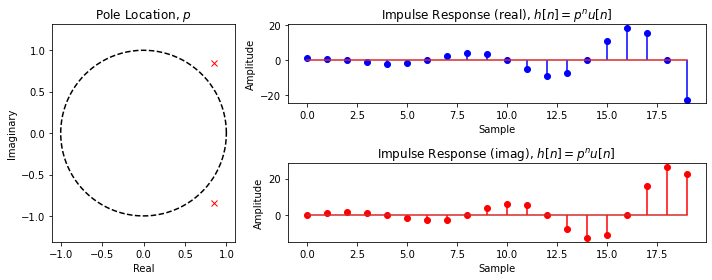

In [8]:
analyze_iir_by_pole(1.2*np.exp(1j*np.pi/4))